<a href="https://colab.research.google.com/github/Matheus-Homem/churn-project/blob/main/notebooks/Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

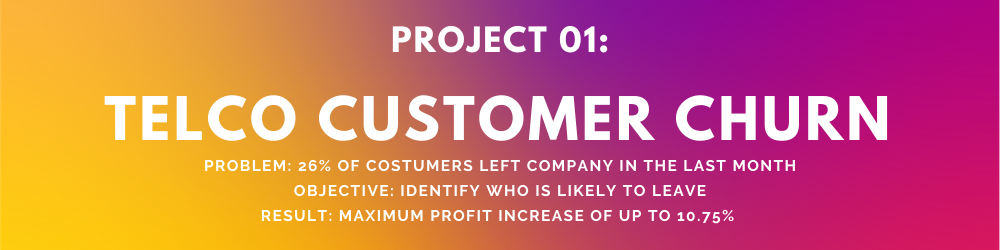

---

# Business Problem
- A telecommunications company is having to deal with a very common problem for companies today: **customers leaving the company** (also known as *Churn*);
- To solve this problem, a Data Science project will be developed in order to identify such customers, and thus prevent their departure through methods that will be developed by the company;
- As the data contained in the dataset are fictitious, because of that, there is a much higher occurrence of churn than the real average, this will impact a lot on the final profit result;

---

# General Information

## Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

### Customers who left within the last month:
- The column is called **Churn**;

###  Services that each customer has signed up for:
- **PhoneService**: Whether the customer has a phone service or not (Yes, No);
- **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service);
- **InternetService**: Customer’s internet service provider (DSL, Fiber optic, No);
- **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service);
- **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service);
- **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service);
- **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service);
- **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service);
- **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service);

### Customer account information:
- **tenure**: Number of months the customer has stayed with the company;
- **Contract**: The contract term of the customer (Month-to-month, One year, Two year);
- **PaymentMethod**: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic));
- **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No);
- **MonthlyCharges**: The amount charged to the customer monthly;
- **TotalCharges**: The total amount charged to the customer;

### Demographic info about customers:
- **gender**: Whether the customer is a male or a female;
- **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0);
- **Partner**: Whether the customer has a partner or not (Yes, No);
- **Dependents**: Whether the customer has dependents or not (Yes, No);

## Overview

The project is organized as follows:

1. [**Imports**](#scrollTo=xw63PPx4uveb&line)

2. [**Data Cleaning**](#scrollTo=ME3KGps-uved)<br>
  2.1. [NA Processing](#scrollTo=VLMDkkkZuvef)<br>
  2.2. [Outliers Processing](#scrollTo=pyRewcTjuvek)<br>
       
3. [**Exploratory Data Analysis (EDA)**](#scrollTo=T_ec9Q0wPLG0)<br>
  3.1. [Variable Processing](#scrollTo=go39WocRuven)<br>
  3.2. [Univariate Analysis](#scrollTo=psWClDNluven)<br>
  3.3. [Bivariate and Multivariate Analysis](#scrollTo=l2nfK7Xsuver)<br>
  3.4. [Hypothesis Validation](#scrollTo=dObGuXMxPNeo)<br>

4. [**Data Preprocessing**](#scrollTo=ilG5iR596V0l)<br>
  4.1. [Feature Engineering](#scrollTo=ofyAjYBmyONB)<br>
  4.2. [Dataset Splitting](#scrollTo=AcOTqex36gkQ)<br>
  4.3. [Feature Scalling](#scrollTo=BQGTe7Xe8Qps)<br>
    
5. [**Machine Learning Modeling**](#scrollTo=HHg_GFBgABE7)<br>
  5.1 [Modeling with Unbalanced Dataset](#scrollTo=GdXa1gwPswvP)<br>
  5.2 [Balancing Dataset with SMOTE Technique](#scrollTo=7P8mYyYLjbfE)<br> 
    
6. [**Conclusion**](#scrollTo=SJOxtmTAIRUj)<br>
  6.1 [Business Impact](#scrollTo=8yq1MKg4KGH-)

---

<a id='imports'></a>
# 1. Imports 

In [129]:
# Importing Data Handling libraries
import numpy as np
import pandas as pd

# Importing Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Importing Dataset Splitting, Cross Validation and Grid Search w/ Cross validation libraries
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV

# Importing Feature Scalling libraries
from sklearn.preprocessing import StandardScaler, normalize

# Importing Machine Learning Models libraries
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Importing Metrics libraries
from sklearn.metrics import confusion_matrix

# Importing Metric Plots libraries
from sklearn.metrics import classification_report, plot_confusion_matrix

# Importing Balancing libraries
from imblearn.over_sampling import SMOTE

# Supressing Warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Creating the project color palette
sns.set_palette(sns.color_palette(["#E6B800","#972573"]))

In [3]:
# Importing dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Matheus-Homem/churn-project/main/data/Telco-Customer-Churn.csv')

# 2. Data Cleaning

In [4]:
# Changing the max display to show 50 columns and 100 rows
pd.options.display.max_rows = 100
pd.options.display.max_columns = 50

In [5]:
# Printing the head of the dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Printing the shape of the dataframe
print('The original dataframe has {} rows and {} columns.'.format(df.shape[0],df.shape[1]))

The original dataframe has 7043 rows and 21 columns.


## 2.1 NA Processing

In [7]:
# There is apparently no missing data in this dataset;
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- But we can observe that the TotalCharges variable (The total amount charged to the customer) has a Dtype = object when it should be a continuous variable. Let's take a closer look and try to convert this column to numerical:

In [8]:
print("TotalCharges variable have {} unique values.".format(df['TotalCharges'].nunique()))

TotalCharges variable have 6531 unique values.


In [9]:
# Printing the most frequent values of TotalCharges
df['TotalCharges'].value_counts().head()

20.2     11
         11
19.75     9
20.05     8
19.9      8
Name: TotalCharges, dtype: int64

- Looks like there's a string in the TotalCharges column;

In [10]:
print("The ratio of blank values is: {}".format(df['TotalCharges'].value_counts()[0]/df.shape[0]))

The ratio of blank values is: 0.001561834445548772


In [11]:
# Because the quantity is low (less than 1%), we can just delete the lines with the empty string and then transform the variable;
df[df['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
# Filtering df to when TotalCharges isn't a blank string;
df = df[df['TotalCharges']!=' ']

# Transforming TotalCharges to numeric;
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
# Now we took out 11 lines but there isn't any blank values;
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## 2.2 Outliers Processing

In [14]:
# Description of numeric variables
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


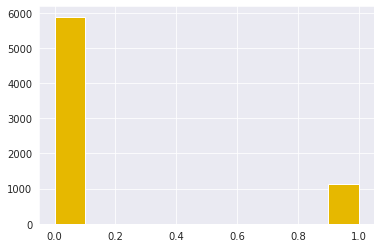

In [15]:
# SeniorCitizen is a categorical variable with numerical dtype
df['SeniorCitizen'].hist()
plt.show()

In [16]:
# Helper function 01

def outliers_search(variable):
  fig, axes = plt.subplots(1,2,figsize=(17,5))
  sns.histplot(x=variable,data=df,ax=axes[0])
  sns.boxplot(x=variable,data=df,ax=axes[1])

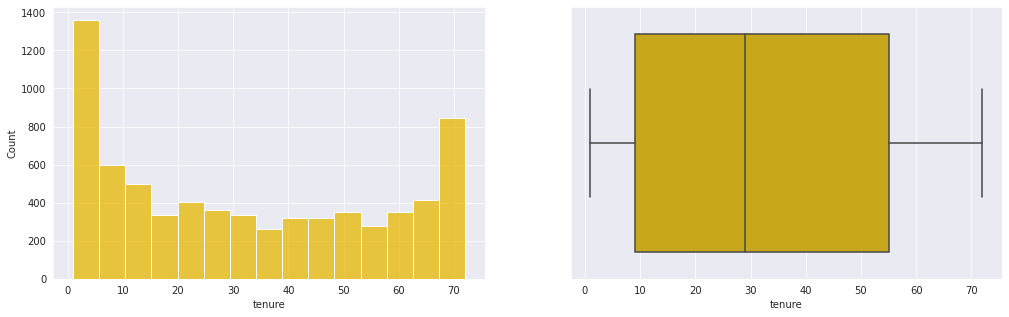

In [17]:
# Tenure variable does not have any visible outliers
outliers_search('tenure')

- *INSIGHT*: The absence of outliers may be due to the very nature of the variable. The dataset contains customers who are in the company from 1 to 72 months, and this means that there are no outliers;


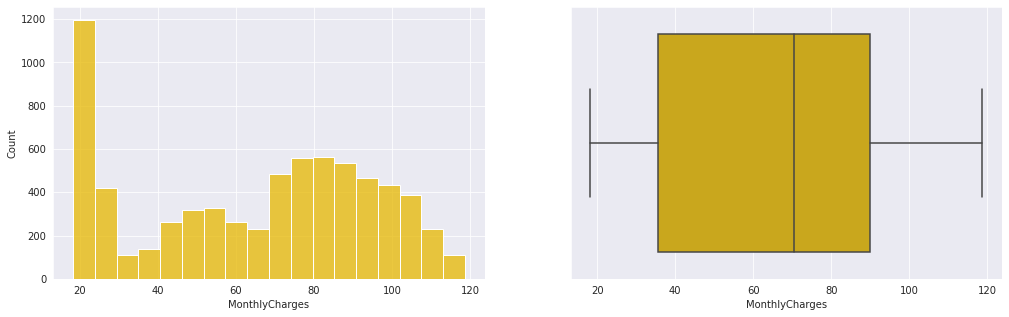

In [18]:
# MonthlyCharges variable also does not have any visible outliers
outliers_search('MonthlyCharges')

- *INSIGHT*: As in "tenure", MonthlyCharges deals with a variable that may have a minimum and maximum value, since even if a person contracts all Telco services, he has a maximum monthly payment amount;

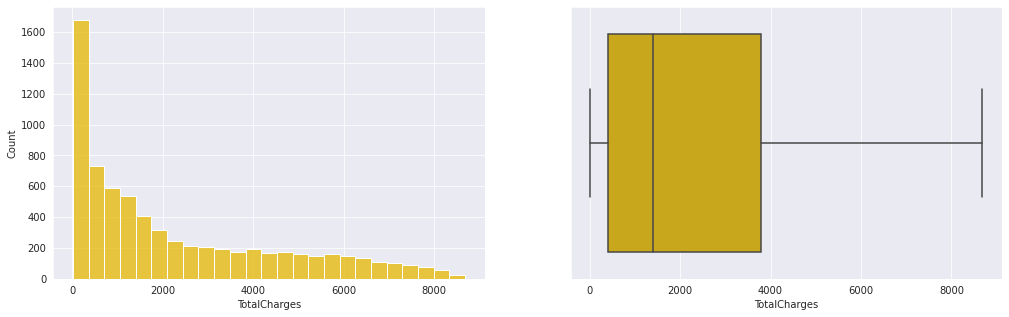

In [19]:
# TotalCharges variable also does not have any visible outliers
outliers_search('TotalCharges')

- *INSIGHT*: Here, once again, the lack of outliers can be attributed to the possible existence of a maximum and a minimum amount that each consumer has paid in total;

# 3. Exploratory Data Analysis (EDA)

## 3.1 Variable Processing

### CustomerID Variable Drop

In [20]:
print('The customerID column has {} unique values, meaning 1 value for each individual column.\nBecause of this we are going to drop it.'.format(df['customerID'].nunique()))
df.drop('customerID',axis=1,inplace=True)
print('Now we got {} columns.'.format(df.shape[1]))

The customerID column has 7032 unique values, meaning 1 value for each individual column.
Because of this we are going to drop it.
Now we got 20 columns.


### Creation of Total Services Variable

In [21]:
# Creating a dataframe with all 9 possible services
services = df[['PhoneService','MultipleLines','InternetService',
               'OnlineSecurity','OnlineBackup','DeviceProtection',
               'TechSupport','StreamingTV','StreamingMovies']]

In [22]:
# Transforming data to show 1 when service is contracted and 0 when it isn't
services['PhoneService'] = services['PhoneService'].map({'Yes':1,'No':0})
for item in ['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']:
  services[item] = services[item].map({'Yes':1,'No internet service':0,'No':0})
services['MultipleLines'] = services['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})
services['InternetService'] = services['InternetService'].map({'DSL':1,'Fiber optic':1,'No':0})
services.head()

,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0,0,1,0,1,0,0,0,0
1,1,0,1,1,0,1,0,0,0
2,1,0,1,1,1,0,0,0,0
3,0,0,1,1,0,1,1,0,0
4,1,0,1,0,0,0,0,0,0


In [23]:
# Adding the values from each row to create a new column
services['total_services'] = services.sum(axis=1)

# Transferring the column to the original dataframe
df = pd.concat([df, services['total_services']], axis=1)

## 3.2 Univariate Analysis

### Overall Look

In [24]:
# Describing all the dtype = object variables
df.describe(include=object)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


- *INSIGHT*: We can see that the number of categories in each variable varies from 2 to 4, and commonly these categories have values ​​like "Yes" or "No", so let's create some plots to analyze;

In [25]:
cat = ['Churn','gender','Partner','Dependents',
       'PhoneService','MultipleLines','PaymentMethod','PaperlessBilling',
       'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
       'TechSupport','StreamingTV','StreamingMovies','Contract']

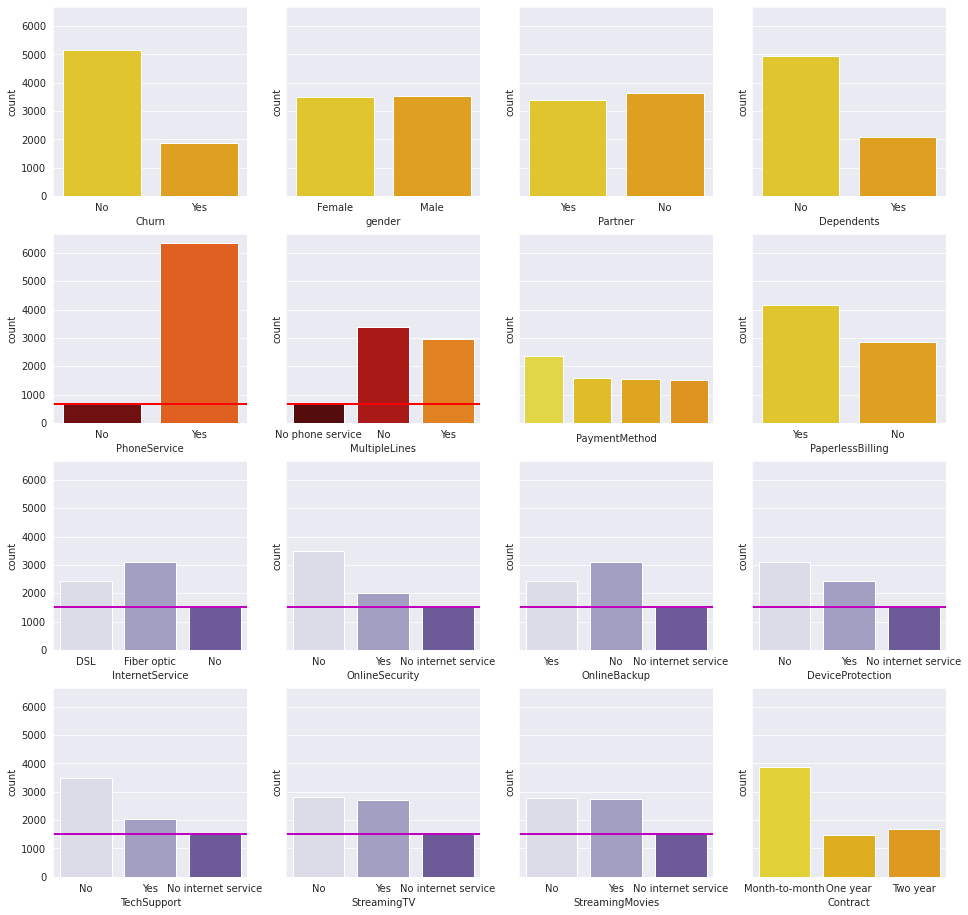

In [26]:
fig, axes = plt.subplots(4,4,figsize=(16,16),sharey=True)

No_Int_Serv = df['InternetService'].value_counts().loc['No']

No_Phone_Serv = df['PhoneService'].value_counts().loc['No']

i = 0
for row in range(4):
    for column in range(4):
        if i in [0,1,2,3,7,15]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Wistia')
        elif i==6:
            g = sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Wistia')
            axes[row,column].set_xticklabels('')         
        elif i in [4,5]:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='gist_heat')
            axes[row,column].axhline(y=No_Phone_Serv,linewidth=2, color='r')
        else:
            sns.countplot(x=cat[i],data=df,ax=axes[row,column],palette='Purples')
            axes[row,column].axhline(y=No_Int_Serv,linewidth=2, color='m')
        i += 1

- *INSIGHT 1*: Through the red plots, we can clearly see that the same amount is repeated in the **"No" column** of "PhoneService" and in the **"No Phone Service" column** of "MultipleLines", but we need to check to see if they are the same lines and **not a coincidence of values**;
- *INSIGHT 2*: In the purple plots, the same value is **repeated in 7 variables**, but as mentioned above, we need to know if it is **not just a coincidence of values** ​​by testing the rows of these columns;
- This information may sounds obvivious due to the name of the variables and categories, but if the values ​​were encrypted, this analysis would be necessary;




In [27]:
pd.crosstab(df['PhoneService'],df['MultipleLines'])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,680,0
Yes,3385,0,2967


- *INSIGHT*: As we can see, **the assumption was correct**, whenever "PhoneService" is "No", "MultipleLines" is "No phone service";


In [28]:
df[df['InternetService']=='No'][['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']].value_counts()

OnlineSecurity       OnlineBackup         DeviceProtection     TechSupport          StreamingTV          StreamingMovies    
No internet service  No internet service  No internet service  No internet service  No internet service  No internet service    1520
dtype: int64

- *INSIGHT*: One more time, **the assumption was correct**, if we filter the dataset to just when "InternetService" equals "No", the other 6 purple plot variables are "No internet service";

### The Total Services Column

Text(0, 0.5, 'Count')

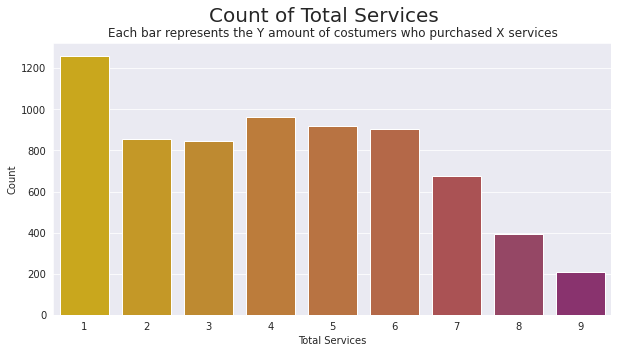

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(df['total_services'],palette=sns.color_palette(["#E6B800","#DEA40D","#D69019","#D17C26","#CC6F2E","#C66136","#B84446","#A23A62","#972573","#8C1084"]))
plt.suptitle('Count of Total Services',fontsize=20)
plt.title('Each bar represents the Y amount of costumers who purchased X services')
plt.xlabel('Total Services')
plt.ylabel('Count')

- *INSIGHT*: As expected, there are more customers who purchased few services than customers who purchased more services;

## 3.3 Bivariate and Multivariate Analysis

### Tenure x Contract

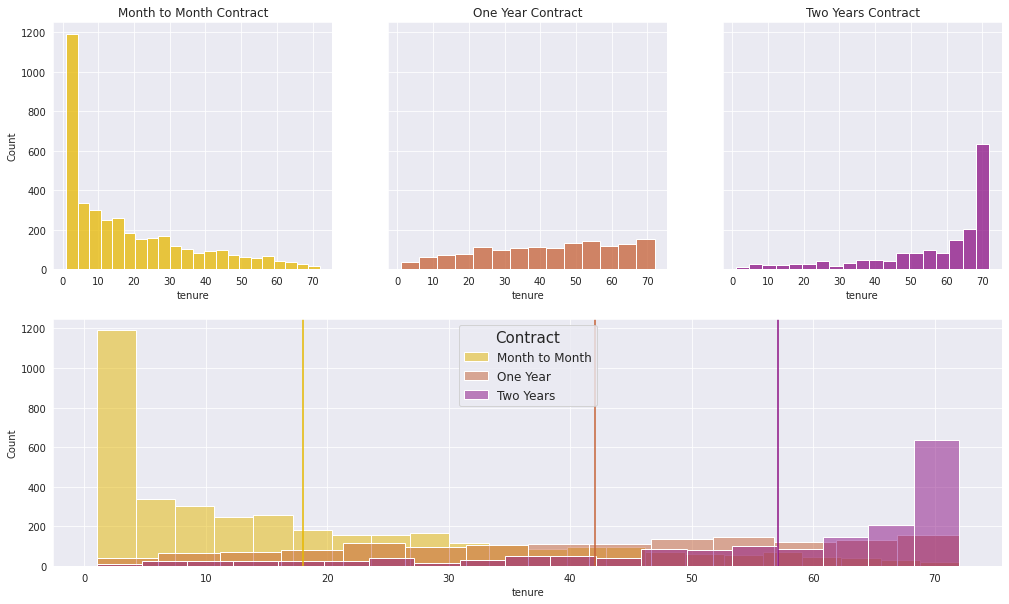

In [30]:
fig, axes = plt.subplots(2,3,figsize=(17,10),sharey=True)
gs = axes[0, 1].get_gridspec()
for ax in axes[1,:3]:
    ax.remove()
axbig = fig.add_subplot(gs[1, :3])

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axes[0,0])
axes[0,0].set_title('Month to Month Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axes[0,1],color="#C66136")
axes[0,1].set_title('One Year Contract')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axes[0,2],color="#8C1084")
axes[0,2].set_title('Two Years Contract')

MtM_mean = df[df['Contract']=='Month-to-month']['tenure'].mean()
OY_mean = df[df['Contract']=='One year']['tenure'].mean()
TY_mean = df[df['Contract']=='Two year']['tenure'].mean()

sns.histplot(x='tenure',data=df[df['Contract']=='Month-to-month'],ax=axbig,alpha=0.5,label='Month to Month')
sns.histplot(x='tenure',data=df[df['Contract']=='One year'],ax=axbig,color="#C66136",alpha=0.5,label='One Year')
sns.histplot(x='tenure',data=df[df['Contract']=='Two year'],ax=axbig,color="#8C1084",alpha=0.5,label='Two Years')
axbig.legend(loc=9,fontsize=12,title="Contract",title_fontsize=15)
plt.axvline(x=MtM_mean)
plt.axvline(x=OY_mean,color="#C66136")
plt.axvline(x=TY_mean,color="#8C1084")

- *INSIGHT*: Customers who purchase a monthly contract tend to stay less as Telco customers, while customers who contract the company for two years tend to stay longer;
- *INTERPRETATION*: Each vertical line represents the **mean** of the distribution;

### Total Services x Monthly Charge

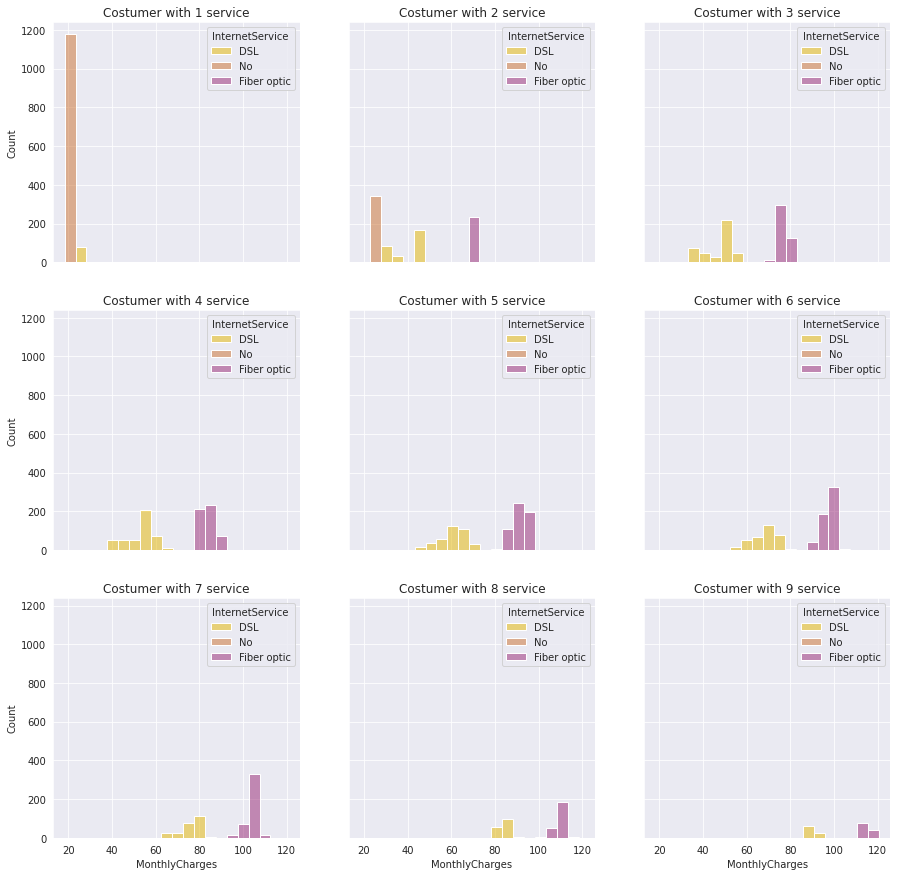

In [31]:
sns.set_palette(sns.color_palette(["#E6B800","#CC6F2E","#972573"]))
fig, axes = plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)

i = 1

for row in range(3):
  for column in range(3):
    sns.histplot(data=df[df['total_services']==i],x='MonthlyCharges',
                 ax=axes[row,column],binwidth=5,
                 hue='InternetService',hue_order=['DSL','No','Fiber optic']).set_title('Costumer with {} service'.format(i))
    i += 1

- *INSIGHT 1*: We can clearly see a correlation between MonthlyCharges and Total_Services, the more services a customer buys, the more he pays;
- *INSIGHT 2*: During the creation of the plots above, a spacing between the columns of the histogram of the same amount of services was noted, after some tests we realized that when we apply a data division with the variable InternetService, the graphs are perfectly divided, which implies:
  - Customers that buys "fiber optic" tends to pay more than other costumers (monthly), regardless of the services amount;


### Total Services x Total Charges

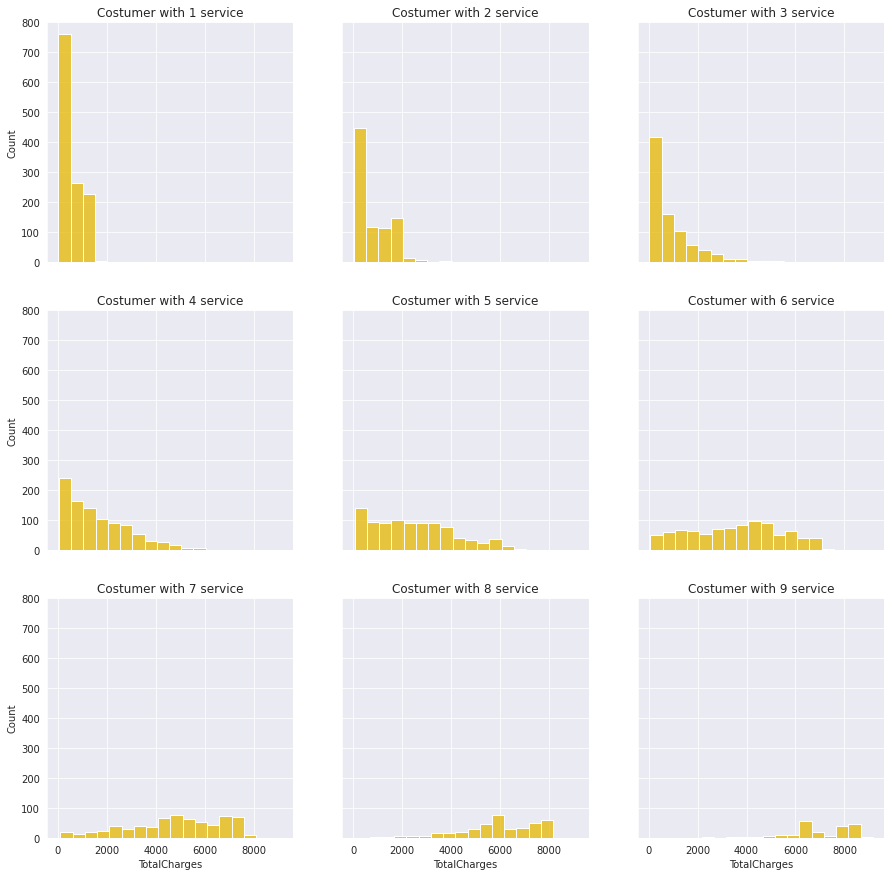

In [32]:
sns.set_palette(sns.color_palette(["#E6B800","#972573"]))
fig, axes = plt.subplots(3,3,figsize=(15,15),sharex=True,sharey=True)

i = 1

for row in range(3):
  for column in range(3):
    sns.histplot(data=df[df['total_services']==i],x='TotalCharges',
                 ax=axes[row,column],binwidth=500).set_title('Costumer with {} service'.format(i))
    i += 1

- *INSIGHT*: This time, we can observe a concentration in lower charges when the total services is low (less than 3), and higher charges when the total services is also high (9), but the intermediary values ​​have a wide range when compared to the monthly payment;

### Tenure x Churn

Text(0.5, 1.0, 'Stacked Histogram of Tenure Count x Churn')

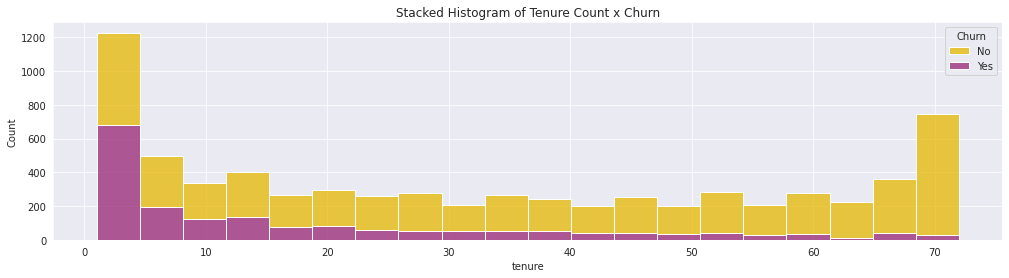

In [33]:
plt.figure(figsize=(17,4))
sns.histplot(data=df,x='tenure',hue='Churn',bins=20,multiple='stack').set_title('Stacked Histogram of Tenure Count x Churn')

- *INSIGHT*: Here it is visible that the values ​​for when Churn occurs decrease when the customer stays longer at Telco;


### Churn relation with TotalCharges and MonthlyCharges

Text(0.5, 1.0, 'TotalCharges separated by Churn')

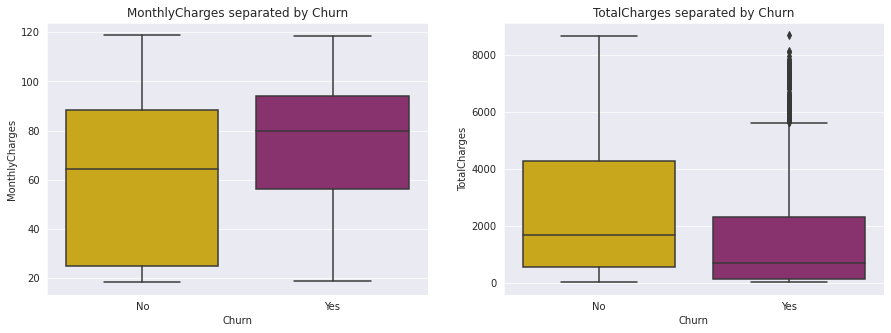

In [34]:
fig, axes = plt.subplots(1,2,figsize=(15,5))
sns.boxplot(data=df,y='MonthlyCharges',x='Churn',ax=axes[0]).set_title('MonthlyCharges separated by Churn')
sns.boxplot(data=df,y='TotalCharges',x='Churn',ax=axes[1]).set_title('TotalCharges separated by Churn')

- *INSIGHT 1*: We noticed that the occurrence of Churn is more frequently in the high values ​​of MonthlyCharges (but still, it is well distributed since there are no outliers);
- *INSIGHT 2*: On the other hand, the occurrence of Churn when analyzed from the perspective of TotalCharges occurs more frequently at low values ​​with some upper outliers;
- Let's analyze it from another view:

Text(0.5, 1.0, 'MonthlyCharges x Total Charges w/ hue=Churn')

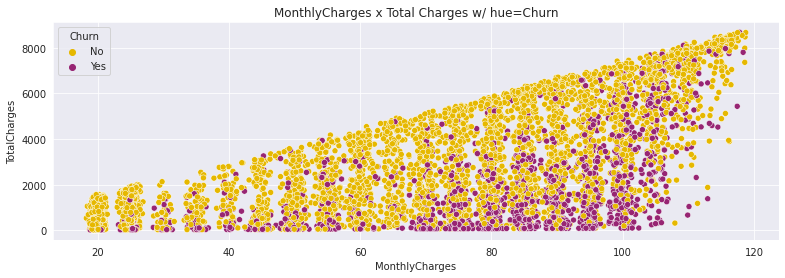

In [35]:
plt.figure(figsize = (13,4))
sns.scatterplot(data=df,y='TotalCharges',x='MonthlyCharges',hue='Churn').set_title('MonthlyCharges x Total Charges w/ hue=Churn')

- *INSIGHT*: Here we can see more clearly that the occurrence of Churn is more frequent in the low values ​​of TotalCharges (this regardless of the  MonthlyCharges values)
- This may be related to the fact that churn occurs more frequently when the person stays less at Telco, which leads to that person having a lower TotalCharge;


## 3.4 Hypothesis Validation

### *Code used for Hypothesis Tests*

In [36]:
# Proportion Z-Test for 2 Samples
def proportion(dfx,lista,z_base):
  # Calculating information of Sample 1:
  churn_1 = dfx['Yes'][0]
  n_1 = dfx.sum(axis=1)[0]
  proportion_1 = n_1/df.shape[0]

  # Calculating information of Sample 2:
  churn_2 = dfx['Yes'][1]
  n_2 = dfx.sum(axis=1)[1]
  proportion_2 = n_2/df.shape[0]

  # Creating a table with stats of samples
  df_stats = pd.DataFrame([[churn_1,n_1,proportion_1],
                           [churn_2,n_2,proportion_2]],
                           index = lista,
                           columns = ['X','n','proportion'])
  print(df_stats)
  print('\n')
  p_bar = (proportion_1*n_1+proportion_2*n_2)/df.shape[0]
  z = (proportion_1-proportion_2)/np.sqrt(p_bar*(1-p_bar)*(1/n_1+1/n_2))
  if np.absolute(z) > z_base:
    print('Since p-value < alpha, H0 is can be rejected!')
  elif np.absolute(z) < z_base:
    print("Since p-value > alpha, we can't reject H0.")

def mean(dfx,lista):
  # Normalizing and calculating information of Sample 1:
  churn_1 = normalize(dfx,norm='l1')[0,1]
  n_1 = dfx.sum(axis=1)[0]
  sigma_1 = np.sqrt(churn_1*(1-churn_1))

  # Calculating information of Sample 2:
  churn_2 = normalize(dfx,norm='l1')[1,1]
  n_2 = dfx.sum(axis=1)[1]
  sigma_2 = np.sqrt(churn_2*(1-churn_2))

  # Creating a table with stats of samples
  df_stats = pd.DataFrame([[churn_1,n_1,sigma_1],
                            [churn_2,n_2,sigma_2]],
                            index = lista,
                            columns = ['X_bar','n','sigma'])
  print(df_stats)
  print('\n')
  z = (churn_1-churn_2)/np.sqrt(((sigma_1**2)/n_1)+((sigma_2**2)/n_2))
  print('The z-score found is {};'.format(z))

### $H_{1}:$ Occurrence of Churn are not equal in men and women (Churn dependent of gender)
- **RESULT**: Failed to reject $H_{0}$

- $H_{0}:p_{men}=p_{women}$
- $H_{1}:p_{men}\neq p_{women}$ 
- $\alpha = 0.05 = 5\% \therefore z=1.96$
- Assuming $H_{0}$ is true:

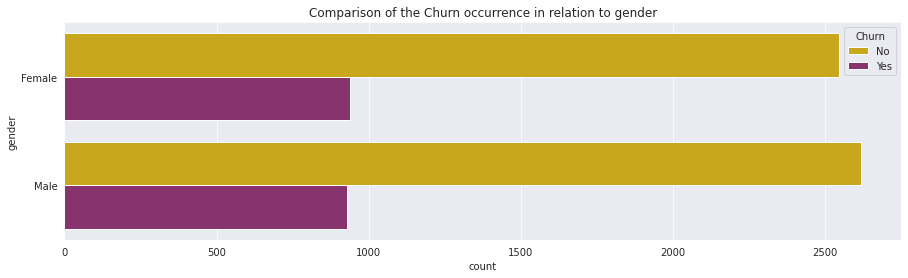

In [37]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,y='gender',hue='Churn').set_title('Comparison of the Churn occurrence in relation to gender')
plt.show()

In [38]:
df_h1 = pd.crosstab(df['gender'],df['Churn'])
df_h1.index.name,df_h1.columns.name = (' ',' ')
df_h1

,No,Yes
,,
Female,2544,939
Male,2619,930


In [39]:
proportion(df_h1,['Female','Male'],1.96)

          X     n  proportion
Female  939  3483    0.495307
Male    930  3549    0.504693


Since p-value > alpha, we can't reject H0.


### $H_{2}:$ Occurrence of Churn is higher in the first year of people as costumers than in more time
- **RESULT**: *True*

- $H_{0}:p_{first-year} \leq p_{more-time} \Rightarrow p_{first-year}-p_{more-time} \leq 0$
- $H_{2}:p_{first-year} > p_{more-time} \Rightarrow p_{first-year}-p_{more-time} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assuming $H_{0}$ as true:

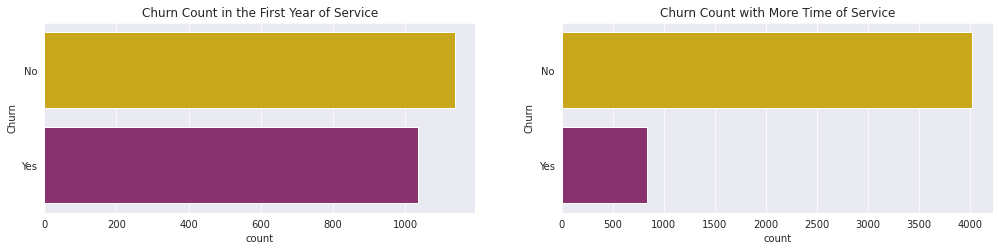

In [40]:
fig, axes = plt.subplots(1,2,figsize=(17,3.5))

sns.countplot(data=df[df['tenure']<=12],y='Churn',ax=axes[0]).set_title('Churn Count in the First Year of Service')

sns.countplot(data=df[df['tenure']>12],y='Churn',ax=axes[1]).set_title('Churn Count with More Time of Service')
plt.show()

In [41]:
df_h2 = pd.DataFrame([pd.crosstab(df[df['tenure']<=12]['tenure'],df[df['tenure']<=12]['Churn']).sum(),
                      pd.crosstab(df[df['tenure']>12]['tenure'],df[df['tenure']>12]['Churn']).sum()],
                      index = ['First Year','More Time'])
df_h2.columns.name = ' '
df_h2

,No,Yes
First Year,1138,1037
More Time,4025,832


In [42]:
proportion(df_h2,['First Year','More Time'],1.645)

               X     n  proportion
First Year  1037  2175      0.3093
More Time    832  4857      0.6907


Since p-value < alpha, H0 is can be rejected!


- As expected when looking at the graph, the p-value is smaller than $\alpha$, which makes us sure that we can reject the null hypothesis and accept the hypothesis 2 as true;


### $H_{3}:$ The proportion of Churn occurrence is higher when costumers are Senior;
- **RESULT**: *True*

- $H_{0}:p_{senior} \leq p_{non-senior} \Rightarrow p_{senior} - p_{non-senior} \leq 0$
- $H_{3}:p_{senior} > p_{non-senior} \Rightarrow p_{senior} - p_{non-senior} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assuming $H_{0}$ as true:

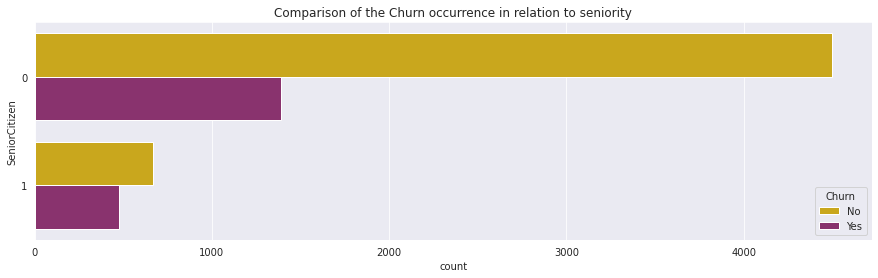

In [43]:
plt.figure(figsize=(15,4))
sns.countplot(data=df,y='SeniorCitizen',hue='Churn').set_title('Comparison of the Churn occurrence in relation to seniority')
plt.show()

In [44]:
df_h3 = pd.crosstab(df['SeniorCitizen'],df['Churn'])
df_h3.index.name,df_h3.columns.name = (' ',' ')
df_h3.index = ['Not Senior','Senior']
df_h3

,No,Yes
Not Senior,4497,1393
Senior,666,476


In [45]:
proportion(df_h3,['Not Senior','Senior'],1.645)

               X     n  proportion
Not Senior  1393  5890      0.8376
Senior       476  1142      0.1624


Since p-value < alpha, H0 is can be rejected!


### $H_{4}:$ The proportion of Churn occurrence is higher when costumers don't have partners;
- **RESULT**: *True*

- $H_{0}:p_{no-partners} \leq p_{partners} \Rightarrow p_{no-partners} - p_{partners} \leq 0$
- $H_{4}:p_{no-partners} > p_{partners} \Rightarrow p_{no-partners} - p_{partners} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assuming $H_{0}$ as true:

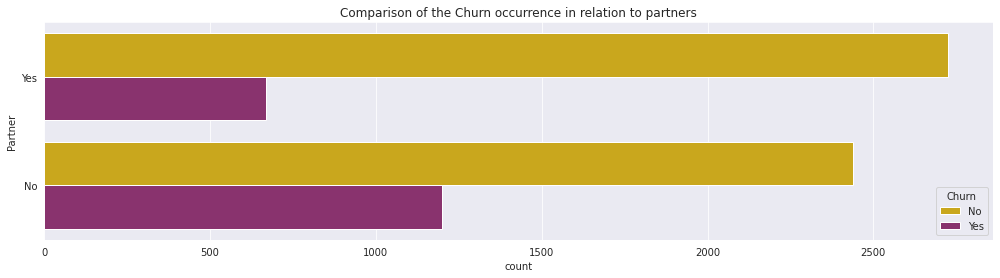

In [46]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='Partner',hue='Churn').set_title('Comparison of the Churn occurrence in relation to partners')
plt.show()

In [47]:
df_h4 = pd.crosstab(df['Partner'],df['Churn'])
df_h4.index.name,df_h4.columns.name = (' ',' ')
df_h4.index = ['No Partner','w/ Partner']
df_h4

,No,Yes
No Partner,2439,1200
w/ Partner,2724,669


In [48]:
proportion(df_h4,['No Partner','w/ Partner'],1.645)

               X     n  proportion
No Partner  1200  3639    0.517491
w/ Partner   669  3393    0.482509


Since p-value < alpha, H0 is can be rejected!


### $H_{5}:$ The proportion of Churn occurrence is higher when costumers don't have dependents;
- **RESULT**: *True*

- $H_{0}:p_{no-dependents} \leq p_{dependents} \Rightarrow p_{no-dependents} - p_{dependents} \leq 0$
- $H_{5}:p_{no-dependents} > p_{dependents} \Rightarrow p_{no-dependents} - p_{dependents} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assuming $H_{0}$ as true:

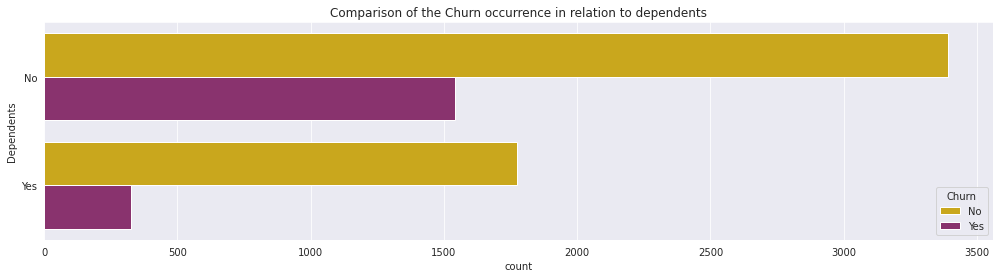

In [49]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='Dependents',hue='Churn').set_title('Comparison of the Churn occurrence in relation to dependents')
plt.show()

In [50]:
df_h5 = pd.crosstab(df['Dependents'],df['Churn'])
df_h5.index.name,df_h5.columns.name = (' ',' ')
df_h5.index = ['No Dependents','w/ Dependents']
df_h5

,No,Yes
No Dependents,3390,1543
w/ Dependents,1773,326


In [51]:
proportion(df_h5,['No Dependents','w/ Dependents'],1.645)

                  X     n  proportion
No Dependents  1543  4933    0.701507
w/ Dependents   326  2099    0.298493


Since p-value < alpha, H0 is can be rejected!


### $H_{6}:$ The proportion of Churn occurrence is higher when costumers have phone service;
- **RESULT**: *True*

- $H_{0}:p_{phoneservice} \leq p_{no-phoneservice} \Rightarrow p_{phoneservice} - p_{no-phoneservice} \leq 0$
- $H_{6}:p_{phoneservice} > p_{no-phoneservice} \Rightarrow p_{phoneservice} - p_{no-phoneservice} > 0$ 
- $\alpha = 0.05 = 5\% \therefore z=1.645$
- Assuming $H_{0}$ as true:

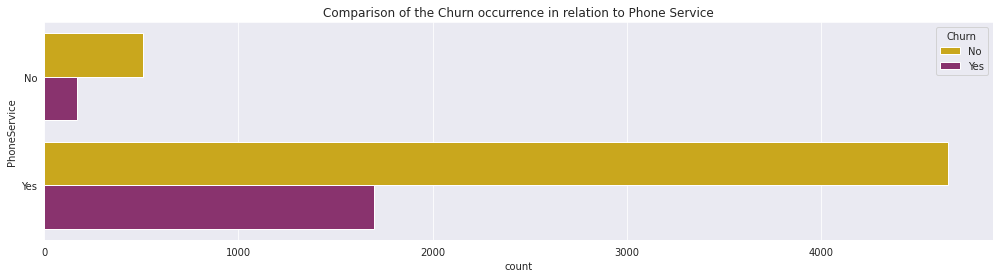

In [52]:
plt.figure(figsize = (17,4))
sns.countplot(data=df,y='PhoneService',hue='Churn').set_title('Comparison of the Churn occurrence in relation to Phone Service')
plt.show()

In [53]:
df_h6 = pd.crosstab(df['PhoneService'],df['Churn'])
df_h6.index.name,df_h6.columns.name = (' ',' ')
df_h6.index = ['No PhoneService','PhoneService']
df_h6

,No,Yes
No PhoneService,510,170
PhoneService,4653,1699


In [54]:
proportion(df_h6,['No PhoneService','PhoneService'],1.645)

                    X     n  proportion
No PhoneService   170   680    0.096701
PhoneService     1699  6352    0.903299


Since p-value < alpha, H0 is can be rejected!


# 4. Data Preprocessing

## 4.1 Feature Engineering

### Encoding **InternetService** column

In [55]:
internetservice = pd.get_dummies(df['InternetService'],prefix='InternetService').drop('InternetService_No',axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic
0,1,0
1,1,0
2,1,0
3,1,0
4,0,1


### Encoding **DeviceProtection, TechSupport, OnlineSecurity, OnlineBackup, Streaming TV and StreamingMovies**

In [56]:
for i in ['DeviceProtection','TechSupport','OnlineSecurity','OnlineBackup','StreamingTV','StreamingMovies']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i).drop('{}_No internet service'.format(i),axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0


### Encoding **gender,Partner,Dependents,PhoneService,Contract,PaperlessBilling,PaymentMethods**

In [57]:
for i in ['gender','Partner','Dependents','PhoneService','Contract','PaperlessBilling','PaymentMethod']:
  internetservice = pd.concat([internetservice,pd.get_dummies(df[i],prefix=i,drop_first=True)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0


### Encoding **MultipleLines** column

In [58]:
internetservice = pd.concat([internetservice,pd.get_dummies(df['MultipleLines'],prefix='MultiLines').drop('MultiLines_No phone service',axis=1)],axis=1)
internetservice.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes
0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
1,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0
2,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0
3,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0
4,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0


### Encoding **Churn** column

In [59]:
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})

## 4.2 Dataset Splitting

In [60]:
internetservice = pd.concat([internetservice,df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges','Churn']]],axis=1)
internetservice.columns

Index(['InternetService_DSL', 'InternetService_Fiber optic',
       'DeviceProtection_No', 'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_Yes', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'StreamingTV_No',
       'StreamingTV_Yes', 'StreamingMovies_No', 'StreamingMovies_Yes',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultiLines_No', 'MultiLines_Yes', 'SeniorCitizen', 'tenure',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [61]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

### Correlation Analysis

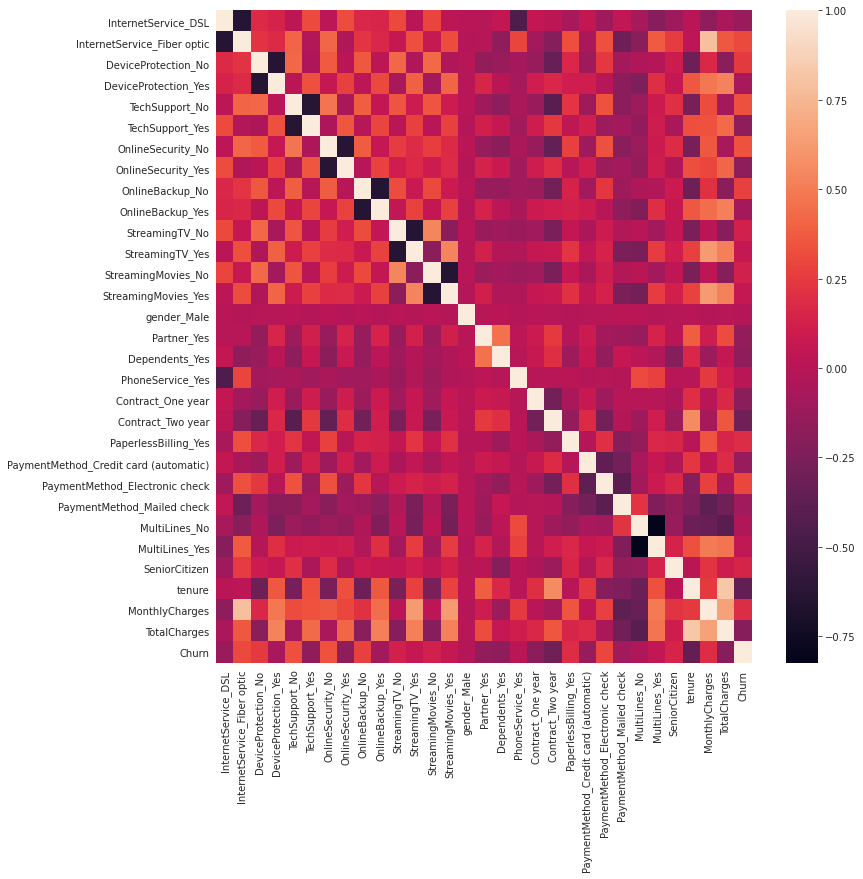

In [62]:
plt.figure(figsize=(12,12))
sns.heatmap(internetservice.corr())

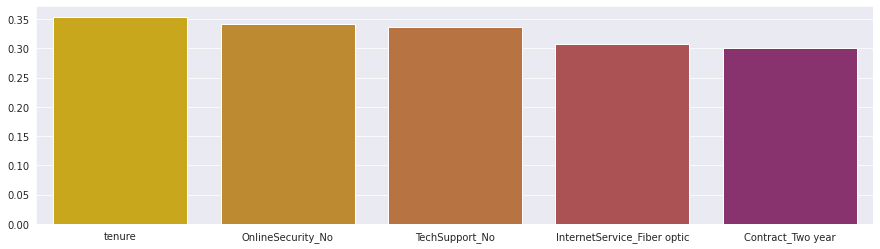

In [63]:
top_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[1:6]

plt.figure(figsize=(15,4))
sns.barplot(y=top_corr.values,x=top_corr.index,palette=sns.color_palette(["#E6B800","#D69019","#CC6F2E","#B84446","#972573"]))

- INSIGHT: Looking at the y-axis, we notice that the top 5 correlations shown above have their values between 0.3 and 0.35 (which are relatively low correlations).

In [64]:
tail_corr = abs(internetservice.corr()['Churn']).sort_values(ascending=False)[-10:]
tail_corr

InternetService_DSL           0.124141
PaymentMethod_Mailed check    0.090773
OnlineBackup_Yes              0.082307
DeviceProtection_Yes          0.066193
StreamingTV_Yes               0.063254
StreamingMovies_Yes           0.060860
MultiLines_Yes                0.040033
MultiLines_No                 0.032654
PhoneService_Yes              0.011691
gender_Male                   0.008545
Name: Churn, dtype: float64

- INSIGHT: We got above the 10 features that least correlates with the Chrun variable;

## 4.3 Feature Scalling

In [65]:
sc = StandardScaler()

In [66]:
X_train[['tenure','MonthlyCharges','TotalCharges']] = sc.fit_transform(X_train[['tenure','MonthlyCharges','TotalCharges']])
X_train.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
1842,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,0.508373,0.383824,0.445832
3358,1,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,-0.223041,-0.361569,-0.357782
2029,0,1,1,0,1,0,0,1,0,1,1,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,1.402324,0.869157,1.679553
2144,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,-1.198259,-0.459298,-0.940289
801,0,1,1,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,-0.913821,1.130873,-0.536565


In [67]:
X_test[['tenure','MonthlyCharges','TotalCharges']] = sc.transform(X_test[['tenure','MonthlyCharges','TotalCharges']])
X_test.head()

,InternetService_DSL,InternetService_Fiber optic,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,MultiLines_No,MultiLines_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3985,1,0,1,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,1,-0.670016,-0.325127,-0.639946
2363,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,-1.279528,-0.649787,-0.985961
2063,1,0,1,0,0,1,0,1,1,0,0,1,0,1,1,1,1,1,1,0,1,0,0,0,1,0,0,0.752178,0.398732,0.752893
2672,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,-0.223041,-1.466406,-0.756341
6402,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,1,0,1,1,0,0,0,0,1,0,0.874080,-0.151202,0.433705


- *Explanation*: We won't fit the X_test (only transform it) because it is considered new data, and if we haven't seen it before, it doesn't make sense the data to be already fitted;

# 5. Machine Learning Modeling

## 5.1 **[First Cycle]** Modeling with Unbalanced Dataset

### Creating Models

#### Baseline

- The baseline model will provide comparative metrics predicted from the data in a simple way;
- The cross validate technique will be used on all models to be tested;
- The confusion matrix will be used when we test the final model with the reserved test data;

In [68]:
base_classifier = DummyClassifier(random_state=1)

In [69]:
# Creating baseline list of metrics
baseline = []

# Cross validating the model
cv_result = cross_validate(base_classifier, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to baseline list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())

In [70]:
# Printing the baseline metrics
baseline

[0.6042920907365879,
 0.2604026845637584,
 0.2826351422828731,
 0.2710630832582052,
 0.5000722435789735]

#### Logistic Regression

In [71]:
classifierLR = LogisticRegression(random_state = 1)

In [72]:
# Creating Logistic Regression list of metrics
logistic_regression = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

In [73]:
# Printing the Logistic Regression metrics
logistic_regression

[0.8096321373124029,
 0.6609923825228734,
 0.5513276208611023,
 0.6006615928281858,
 0.8473353611476895]

#### N Nearest Neighbors (KNN)

In [74]:
classifierKNN = KNeighborsClassifier()

In [75]:
# Creating KNN list of metrics
knn = []

# Cross validating the model
cv_result = cross_validate(classifierKNN, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to KNN list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

In [76]:
# Printing the KNN metrics
knn

[0.7726535995629924,
 0.5683161887819709,
 0.5236379985189886,
 0.5447334940352705,
 0.77601322148044]

#### Support Vector Machine (SVM)

In [77]:
classifierSVM = SVC(random_state=0)


In [78]:
# Creating SVM list of metrics
svm = []

# Cross validating the model
cv_result = cross_validate(classifierSVM, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to SVM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

In [79]:
# Printing the SVM metrics
svm

[0.807172531769306,
 0.6824297138082851,
 0.48508410028562354,
 0.5666055837175593,
 0.7964920215740683]

#### Naive Bayes

In [80]:
classifierNB = GaussianNB()

In [81]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

In [82]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes

[0.7536987522281641,
 0.5195204343712623,
 0.753766000211573,
 0.6146912449204973,
 0.8296647412881288]

#### Decision Tree

In [83]:
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [84]:
# Creating Decision Tree list of metrics
decision_tree = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

In [85]:
# Printing the Decision Tree metrics
decision_tree

[0.7307529756770743,
 0.48349100730817873,
 0.4937956204379562,
 0.48846397254535046,
 0.6559433301756934]

#### Random Forest

In [86]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [87]:
# Creating Random Forest list of metrics
random_forest = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

In [88]:
# Printing the Random Forest metrics
random_forest

[0.7834627105974354,
 0.6218116052156444,
 0.4282291336083783,
 0.5066294630150769,
 0.7943837145238194]

#### XG Boost

In [89]:
classifierXGB = XGBClassifier()

In [90]:
# Creating XG Boost list of metrics
XGB = []

# Cross validating the model
cv_result = cross_validate(classifierXGB, X_train, y_train, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to XG Boost list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

In [91]:
# Printing the XG Boost metrics
XGB

[0.8056552239664194,
 0.6678455128917793,
 0.5062255368666032,
 0.5752859904136198,
 0.8489072264161871]

### Classification Models Comparison

In [92]:
metrics = (pd.DataFrame([baseline,logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Baseline','Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,60.43,26.04,28.26,27.11,50.01
Logistic Regression,80.96,66.10,55.13,60.07,84.73
KNN,77.27,56.83,52.36,54.47,77.60
SVM,80.72,68.24,48.51,56.66,79.65
Naive Bayes,75.37,51.95,75.38,61.47,82.97
Decision Tree,73.08,48.35,49.38,48.85,65.59
Random Forest,78.35,62.18,42.82,50.66,79.44
XG Boost,80.57,66.78,50.62,57.53,84.89


- For our business problem, the most important thing is to correctly predict customers who are likely to leave Telco (True Positives) and to minimize the number of people wrongly classified as not likely to leave (False Negatives).
- Because of this, the main metric to be used will be the Recall, we will not use the F1 Score because there are not so many problems in classifying as likely to leave the people who will no longer leave the company (False Positives)

In [93]:
metrics['Recall'].sort_values(ascending=False)

Naive Bayes            75.38
Logistic Regression    55.13
KNN                    52.36
XG Boost               50.62
Decision Tree          49.38
SVM                    48.51
Random Forest          42.82
Baseline               28.26
Name: Recall, dtype: float64

- We can see above that the Naive Bayes model as a Recall almost 20% over Logistic Regression, and beceause of this, we are going to tune it;

### Tunning Naive Bayes

In [94]:
tuned_classifierNB = GaussianNB()

# Parameters to be used
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=tuned_classifierNB, 
                 param_grid=params_NB, 
                 cv=10, 
                 scoring='recall')

# Fitting the model to the training set  
gs_NB.fit(X_train, y_train)

# Printing the best score adquired from the tunning
best_recall = gs_NB.best_score_
print("Best F1 Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_NB.best_params_
print("Best Parameters:", best_parameters)

Best F1 Score: 75.89 %
Best Parameters: {'var_smoothing': 0.04328761281083057}


In [95]:
metrics.loc['Naive Bayes']

Accuracy     75.37
Precision    51.95
Recall       75.38
F1 Score     61.47
AUROC        82.97
Name: Naive Bayes, dtype: float64

- INSIGHT: The Naive Bayes model has not improved much, and looking at its other metrics, we realize that they are relatively low, so it may be necessary to balance the dataset (since the churn ratio is almost 3:1);

## 5.2 **[Second Cycle]** Balancing Dataset with SMOTE Technique

### Balancing Data

In [96]:
smote = SMOTE()

In [97]:
X_train, X_test, y_train, y_test = train_test_split(internetservice.drop('Churn',axis=1),
                                                    internetservice['Churn'])

In [98]:
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)

In [99]:
X_train = sc.fit_transform(X_train)
X_train_smote = sc.fit_transform(X_train_smote)
X_test = sc.transform(X_test)

In [100]:
print('Before SMOTE: {} lines'.format(X_train.shape[0]))
print('After SMOTE: {} lines'.format(X_train_smote.shape[0]))

Before SMOTE: 5274 lines
After SMOTE: 7726 lines


### Creating Models

#### Baseline

- The baseline model will provide comparative metrics predicted from the data in a simple way;
- The cross validate technique will be used on all models to be tested;
- The confusion matrix will be used when we test the final model with the reserved test data;

In [101]:
base_classifier = DummyClassifier(random_state=1)

In [102]:
# Creating baseline list of metrics
baseline = []

# Cross validating the model
cv_result = cross_validate(base_classifier, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to baseline list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  baseline.append(cv_result[i].mean())

In [103]:
# Printing the baseline metrics
baseline

[0.5045371977826784,
 0.5051612903225806,
 0.49624051090492827,
 0.5004822182037372,
 0.5045206249748966]

#### Logistic Regression

In [104]:
classifierLR = LogisticRegression(random_state = 1)

In [105]:
# Creating Logistic Regression list of metrics
logistic_regression = []

# Cross validating the model
cv_result = cross_validate(classifierLR, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Logistic Regression list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  logistic_regression.append(cv_result[i].mean())

In [106]:
# Printing the Logistic Regression metrics
logistic_regression

[0.7720631212756973,
 0.7542240461205914,
 0.8076555408282122,
 0.7799489395060529,
 0.8524907506664938]

#### N Nearest Neighbors (KNN)

In [107]:
classifierKNN = KNeighborsClassifier()

In [108]:
# Creating KNN list of metrics
knn = []

# Cross validating the model
cv_result = cross_validate(classifierKNN, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to KNN list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  knn.append(cv_result[i].mean())

In [109]:
# Printing the KNN metrics
knn

[0.7927880071587048,
 0.7375257096802754,
 0.9078302606739769,
 0.8133786883464091,
 0.8731643117485144]

#### Support Vector Machine (SVM)

In [110]:
classifierSVM = SVC(random_state=0)


In [111]:
# Creating SVM list of metrics
svm = []

# Cross validating the model
cv_result = cross_validate(classifierSVM, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to SVM list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  svm.append(cv_result[i].mean())

In [112]:
# Printing the SVM metrics
svm

[0.8283920061130511,
 0.8324770319522384,
 0.82290436598787,
 0.8216989129440035,
 0.9237835582080034]

#### Naive Bayes

In [113]:
classifierNB = GaussianNB()

In [114]:
# Creating Gaussian Naive Bayes list of metrics
naive_bayes = []

# Cross validating the model
cv_result = cross_validate(classifierNB, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Gaussian Naive Bayes list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  naive_bayes.append(cv_result[i].mean())

In [115]:
# Printing the Gaussian Naive Bayes metrics
naive_bayes

[0.7746569787316759,
 0.763193472825238,
 0.7967767200867575,
 0.7791512876557377,
 0.8490517928684834]

#### Decision Tree

In [116]:
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

In [117]:
# Creating Decision Tree list of metrics
decision_tree = []

# Cross validating the model
cv_result = cross_validate(classifierDT, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Decision Tree list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  decision_tree.append(cv_result[i].mean())

In [118]:
# Printing the Decision Tree metrics
decision_tree

[0.8057619864735335,
 0.7975560078767036,
 0.8058065898167115,
 0.79153583527492,
 0.8066095413275406]

#### Random Forest

In [119]:
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [120]:
# Creating Random Forest list of metrics
random_forest = []

# Cross validating the model
cv_result = cross_validate(classifierRF, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to Random Forest list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  random_forest.append(cv_result[i].mean())

In [121]:
# Printing the Random Forest metrics
random_forest

[0.8385160769225612,
 0.869584675208037,
 0.7884437214657722,
 0.8073412849349337,
 0.9215655070566035]

#### XG Boost

In [122]:
classifierXGB = XGBClassifier()

In [123]:
# Creating XG Boost list of metrics
XGB = []

# Cross validating the model
cv_result = cross_validate(classifierXGB, X_train_smote, y_train_smote, cv=10,
                            scoring=['accuracy',
                                      'precision',
                                      'recall',
                                      'f1',
                                      'roc_auc'])

# Appending metrics to XG Boost list
for i in ['test_accuracy','test_precision','test_recall','test_f1','test_roc_auc']:
  XGB.append(cv_result[i].mean())

In [124]:
# Printing the XG Boost metrics
XGB

[0.8511887605654573,
 0.864543418260625,
 0.8309073382335221,
 0.8342192498281799,
 0.9434988031518874]

### Classification Models Comparison

In [125]:
metrics = (pd.DataFrame([baseline,logistic_regression,knn,svm,naive_bayes,decision_tree,random_forest,XGB],
                        index=['Baseline','Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','XG Boost'],
                        columns=['Accuracy','Precision','Recall','F1 Score','AUROC'])*100).round(2)

metrics

,Accuracy,Precision,Recall,F1 Score,AUROC
Baseline,50.45,50.52,49.62,50.05,50.45
Logistic Regression,77.21,75.42,80.77,77.99,85.25
KNN,79.28,73.75,90.78,81.34,87.32
SVM,82.84,83.25,82.29,82.17,92.38
Naive Bayes,77.47,76.32,79.68,77.92,84.91
Decision Tree,80.58,79.76,80.58,79.15,80.66
Random Forest,83.85,86.96,78.84,80.73,92.16
XG Boost,85.12,86.45,83.09,83.42,94.35


In [126]:
metrics['Recall'].sort_values(ascending=False)

KNN                    90.78
XG Boost               83.09
SVM                    82.29
Logistic Regression    80.77
Decision Tree          80.58
Naive Bayes            79.68
Random Forest          78.84
Baseline               49.62
Name: Recall, dtype: float64

#### Tuning KNN Model

In [181]:
tuned_classifierKNN = KNeighborsClassifier()

# Parameters to be used
params_KNN = dict(leaf_size = list(range(1,25)),
                  n_neighbors = list(range(1,15)),
                  p = [1,2])

gs_KNN = GridSearchCV(estimator=tuned_classifierKNN, 
                      param_grid=params_KNN, 
                      cv=10, 
                      scoring='recall')

# Fitting the model to the training set  
gs_KNN.fit(X_train_smote, y_train_smote)

# Printing the best score adquired from the tunning
best_recall = gs_KNN.best_score_
print("Best Recall Score: {:.2f} %".format(best_recall*100))

# Printing the best parameter found
best_parameters = gs_KNN.best_params_
print("Best Parameters:", best_parameters)

Best Recall Score: 91.33 %
Best Parameters: {'leaf_size': 1, 'n_neighbors': 13, 'p': 2}


#### Creating Predictions

In [130]:
final_classifierKNN = KNeighborsClassifier(leaf_size = 1,
                                           n_neighbors = 13,
                                           p = 2)

final_classifierKNN.fit(X_train_smote,y_train_smote)

y_predKNN = final_classifierKNN.predict(X_test)

knn_corr = confusion_matrix(y_test, y_predKNN, normalize='true')

print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1300
           1       0.45      0.80      0.58       458

    accuracy                           0.69      1758
   macro avg       0.68      0.73      0.67      1758
weighted avg       0.79      0.69      0.71      1758



In [131]:
classifierXGB.fit(X_train_smote,y_train_smote)

y_predXGB = classifierXGB.predict(X_test)

xgb_corr = confusion_matrix(y_test, y_predXGB, normalize='true')

print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1300
           1       0.63      0.59      0.61       458

    accuracy                           0.80      1758
   macro avg       0.75      0.74      0.74      1758
weighted avg       0.80      0.80      0.80      1758



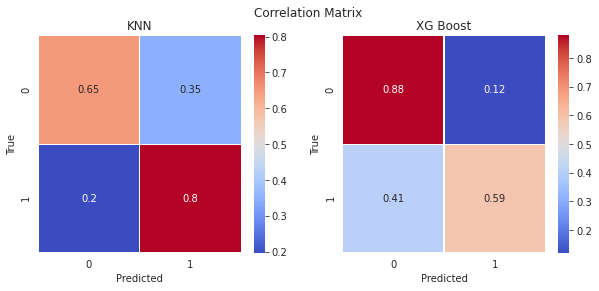

In [132]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
fig.suptitle('Correlation Matrix')

sns.heatmap(knn_corr, annot=True, linewidths=.1, cmap='coolwarm', ax=ax[0])
ax[0].set_title('KNN')
ax[0].set_ylabel('True')
ax[0].set_xlabel('Predicted')

sns.heatmap(xgb_corr, annot=True, linewidths=.1, cmap='coolwarm', ax=ax[1])
ax[1].set_title('XG Boost')
ax[1].set_ylabel('True')
ax[1].set_xlabel('Predicted')


plt.show()

- The KNN model was able to correctly predict 80% of customers who are likely to leave the company, while the XG Boost model (which ranked second best in Recall) predicted only 58% correctly;
- This leads us to conclude that the XG Boost model is useful to predict the cases of customers who do not intend to leave the company (which is not what we want), so the best model to choose is the KNN;

##### Use of Baseline
- If Telco decided to not use the best Machine Learning model (KNN) and instead use the Baseline model, the Recall would be:

In [182]:
base_classifier.fit(X_train_smote,y_train_smote)

y_predBLC = base_classifier.predict(X_test)

blc_corr = confusion_matrix(y_test, y_predBLC, normalize='true')

print(classification_report(y_test, y_predBLC))

              precision    recall  f1-score   support

           0       0.74      0.51      0.60      1300
           1       0.26      0.48      0.34       458

    accuracy                           0.50      1758
   macro avg       0.50      0.50      0.47      1758
weighted avg       0.61      0.50      0.53      1758



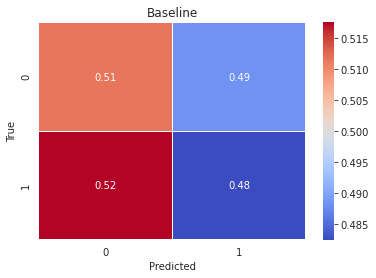

In [184]:
ax = sns.heatmap(blc_corr, annot=True, linewidths=.1, cmap='coolwarm')
ax.set_title('Baseline')
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
plt.show()

# 6. Conclusion

## Business Impact:

In [154]:
print("Telco's revenue last month was USD {}".format(
    df['MonthlyCharges'].sum()))

Telco's revenue last month was USD 455661.0


In [155]:
print('The revenue lost by Telco in this month due to Churn is USD {}'.format(
    df[df['Churn']==1]['MonthlyCharges'].sum()))

The revenue lost by Telco in this month due to Churn is USD 139130.85


In [156]:
print('With our Machine Learning model predicting 80% of people who are likely to leave, we would be able to keep in the company USD {}'.format(round(
    df[df['Churn']==1]['MonthlyCharges'].sum()*0.8,2)))

With our Machine Learning model predicting 80% of people who are likely to leave, we would be able to keep in the company USD 111304.68


In [187]:
print('With the Baseline model predicting 48% of people who are likely to leave, we would be able to keep in the company USD {}'.format(round(
    df[df['Churn']==1]['MonthlyCharges'].sum()*0.48,2)))

With the Baseline model predicting 48% of people who are likely to leave, we would be able to keep in the company USD 66782.81


- Assuming that in this month Telco acquired the same number of customers as in the last month, then:

In [168]:
woML = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()
print('Possible revenue this month w/o Machine Learning is USD {}'.format(woML))

Possible revenue this month w/o Machine Learning is USD 347477.95


In [186]:
wBL = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()+round(df[df['Churn']==1]['MonthlyCharges'].sum()*0.48,2)
print('Possible revenue this month w/ Baseline model is USD {}'.format(wBL))

Possible revenue this month w/ Baseline model is USD 414260.76


In [169]:
wML = df[df['tenure']==1]['MonthlyCharges'].sum()+df[df['Churn']==0]['MonthlyCharges'].sum()+round(df[df['Churn']==1]['MonthlyCharges'].sum()*0.8,2)
print('Possible revenue this month w/ Machine Learning is USD {}'.format(wML))

Possible revenue this month w/ Machine Learning is USD 458782.63


In [189]:
print("The increase in Telco's profit from the Data Science project was {}%".format(round(((wML-wBL)/wBL)*100,2)))

The increase in Telco's profit from the Data Science project was 10.75%


- This value may seem absurd for income growth in a single month, but this is because the churn value of the data is also absurd compared to the real average of 3.2%

In [180]:
print('The Churn rate in Telco is {}%'.format(round(df['Churn'].value_counts(normalize=True).loc[1]*100,2)))

The Churn rate in Telco is 26.58%
